In [2]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
from pathlib import Path

# Part 1: Prepare the Data

In [3]:
#Read in Data
file_path = Path("Resources/myopia.csv")
myo_cluster = pd.read_csv(file_path)
myo_cluster.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [4]:
#Use .dtypes to show types in Dataframe
myo_cluster.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [5]:
#Remove the MYOPIC column from Dataframe
myo_cluster = myo_cluster.drop(columns=['MYOPIC'])
myo_cluster.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
#Drop Null Values
for column in myo_cluster.columns:
    print(f"Column {column} has {myo_cluster[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [7]:
#Locate duplicate entries
print(f"Duplicate entries: {myo_cluster.duplicated().sum()}")

Duplicate entries: 0


In [8]:
#Saving clean Dataframe in new csv
file_path = Path('Resources/cleaned_myopia.csv')
myo_cluster.to_csv(file_path, index=False)

# Part 2: Apply Dimensionality Reduction

In [9]:
#Load cleaned data
file_path = Path("Resources/cleaned_myopia.csv")
myo_cluster = pd.read_csv(file_path)
myo_cluster.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [10]:
pca = PCA(n_components=2)

clusters_pca = pca.fit_transform(myo_cluster)

In [11]:
myo_cluster_pca = pd.DataFrame(
    data=clusters_pca, columns=["principal component 1", "principal component 2"]
)
myo_cluster_pca.head()

,principal component 1,principal component 2
0,12.138059,31.636212
1,-15.268363,-6.095695
2,-11.662239,3.755105
3,11.235886,4.012566
4,-22.446506,4.580916


In [12]:
pca.explained_variance_ratio_

array([0.72557249, 0.16081428])

In [13]:
#t-SNE
myo_tsne = TSNE(learning_rate=250)
tsne_features = myo_tsne.fit_transform(clusters_pca)

C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
# Have dimensions been reduced to two
tsne_features.shape

(618, 2)

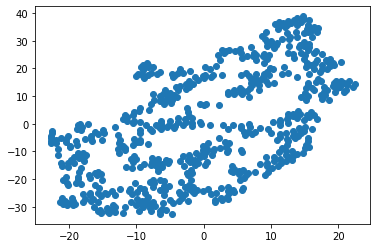

In [18]:
# Plotting
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

#Are there distinct clusters?
##There are no distinct clusters in the above plot.

# Part 3: Perform a Cluster Analysis with K-means

In [29]:
inertia = []
k = list(range(1, 11))


for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(clusters_pca)
    inertia.append(km.inertia_)
    
    
elbow_info = {"k": k, "inertia": inertia}
cluster_elbow = pd.DataFrame(elbow_info)
cluster_elbow.head()

C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:13

,k,inertia
0,1,207420.801229
1,2,99711.333012
2,3,66934.338756
3,4,52076.477755
4,5,41638.355728


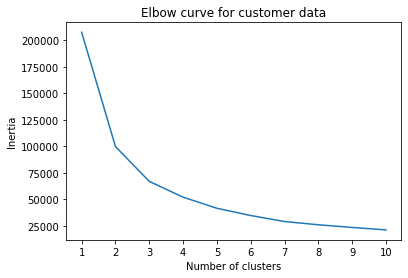

In [30]:
plt.plot(cluster_elbow['k'], cluster_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [31]:
def get_clusters(k, data):
    
    myo = KMeans(n_clusters=k, random_state=0)
    
    myo.fit(data)
    
    myo_predictions = myo.predict(data)
    
    data['class'] = myo.labels_
    
    return data

In [32]:
myopia = get_clusters(5, myo_cluster)

C:\Users\Jalee\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [33]:
myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,4


In [34]:
def show_clusters(clusto):
    plt.scatter(clusto['AL'], clusto['ACD'], c=clusto['class'])
    plt.xlabel('AL')
    plt.ylabel('ACD')
    plt.show()

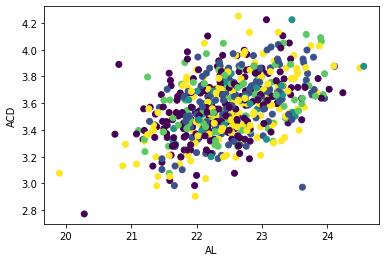

In [35]:
show_clusters(myopia)

# Part 4: Make a Recommendation

In [ ]:
I believe the patients can be clustered as you can see in the graph shown above. 
The patients can be clustered into four clusters.